In [1]:
# Dependencies and Setup
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import csv
import pprint as pprint
from scipy.stats import linregress
from sklearn import datasets
from scipy import stats
from pprint import pprint
path = pd.read_csv("merged.csv")
path.head()


C:\Users\nadzema\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,67,68,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,159,160,167,168,171,172,175,176,177,179,180,183,184,187,188,191,192,195,196,199,200,201,203,204,207,208,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,29

,Unnamed: 0,id,Geographic Area Name,Estimate!!HOUSEHOLDS BY TYPE!!Total households,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Percent!!HOUSEHOLDS BY TYPE!!Total households,Percent Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,...,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,County,State
0,1,0500000US01003,"Baldwin County, Alabama",82325,3231,82325,(X),42253,3566,51.3,...,77281,3480,93.9,1.7,71352,3555,86.7,2.3,Baldwin County,Alabama
1,2,0500000US01015,"Calhoun County, Alabama",44636,2010,44636,(X),20571,1976,46.1,...,38833,2317,87.0,3.1,35353,2291,79.2,3.7,Calhoun County,Alabama
2,3,0500000US01043,"Cullman County, Alabama",32090,1233,32090,(X),17070,1332,53.2,...,27889,1303,86.9,2.7,26323,1391,82.0,3.8,Cullman County,Alabama
3,4,0500000US01049,"DeKalb County, Alabama",24880,1347,24880,(X),13623,1516,54.8,...,21513,1469,86.5,3.7,20393,1453,82.0,3.8,DeKalb County,Alabama
4,5,0500000US01051,"Elmore County, Alabama",30712,1330,30712,(X),16257,1636,52.9,...,27867,1566,90.7,3.0,25995,1677,84.6,3.9,Elmore County,Alabama


In [2]:
# Create a dataframe with only the columns of interest
new_df = path[[ 'Geographic Area Name', "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree", 
               "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
              "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree", 
               "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
              'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size']]
new_df.head()


,Geographic Area Name,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09


In [3]:
# Create a clean_df with renamed columns for ease of reading and later to remove bad data row
clean_df = new_df.rename (columns= {"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree":
                         "Estimate educational attainment Pop 25yrs> Assoc. Degree", 
                         "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree":
                         "Estimate educational attainment Pop 25yrs> Bachelor's Degree",
                        "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Percent educational attainment Pop 25yrs> Assoc. Degree", 
                       "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree":"Percent educational attainment Pop 25yrs> Bachelor's Degree"})
print(len(clean_df))
clean_df.head()

3972


,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09


In [4]:
#Find string data remaining in dataset and remove
nick =[]
n=0
RowToDrop =0
for item in clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"]:
    
    try:
        int(item)
        nick.append(int(item))
    except:
        print(item)
        print("row to remove:"+str(n))
        RowToDrop = n
    n+=1

clean_df = clean_df.drop(RowToDrop)
clean_df.head()

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree
row to remove:829


,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09


In [5]:
#Convert datatype to int/float
#Add column Sum of Higher Education that adds associate and bachelor's total
clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"] = clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"].astype(int)
clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"]=clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"].astype(int)
clean_df["Percent educational attainment Pop 25yrs> Assoc. Degree"] = clean_df["Percent educational attainment Pop 25yrs> Assoc. Degree"].astype(float)
clean_df["Percent educational attainment Pop 25yrs> Bachelor's Degree"] = clean_df["Percent educational attainment Pop 25yrs> Bachelor's Degree"].astype(float)
clean_df["Sum of Higher Education"] = clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"] + clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"]
clean_df['Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size'] = clean_df["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].astype(float)
clean_df["County"] = path["County"]
clean_df["State"] = path["State"]
clean_df

,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size,Sum of Higher Education,County,State
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36,48951,Baldwin County,Alabama
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06,16194,Calhoun County,Alabama
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00,12718,Cullman County,Alabama
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62,8126,DeKalb County,Alabama
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09,15239,Elmore County,Alabama
...,...,...,...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32,7510,Sweetwater County,Wyoming
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01,7522,Teton County,Wyoming
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23,2784,Uinta County,Wyoming
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89,1414,Washakie County,Wyoming


In [6]:
#Create group by dataframe "state_ed" for charting
state_ed = clean_df.groupby('State')["Percent educational attainment Pop 25yrs> Bachelor's Degree"].mean()
house_ed = clean_df.groupby('State')["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].mean()
state_ed = state_ed.reset_index()
house_ed = house_ed.reset_index()
state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"] = house_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
state_ed = state_ed.sort_values(by=["Percent educational attainment Pop 25yrs> Bachelor's Degree"],ascending =False)
state_ed = state_ed.reset_index()
state_ed.head(100)


,index,State,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,8,District of Columbia,25.250000,3.350000
1,39,Rhode Island,23.700000,3.003333
2,21,Massachusetts,23.503846,3.059231
3,30,New Jersey,23.330952,3.205238
4,5,Colorado,22.007895,2.999737
5,29,New Hampshire,21.162500,2.928750
6,6,Connecticut,21.012500,3.016875
7,45,Vermont,20.620000,2.848667
8,11,Hawaii,20.111111,3.414444
9,20,Maryland,19.040000,3.155750


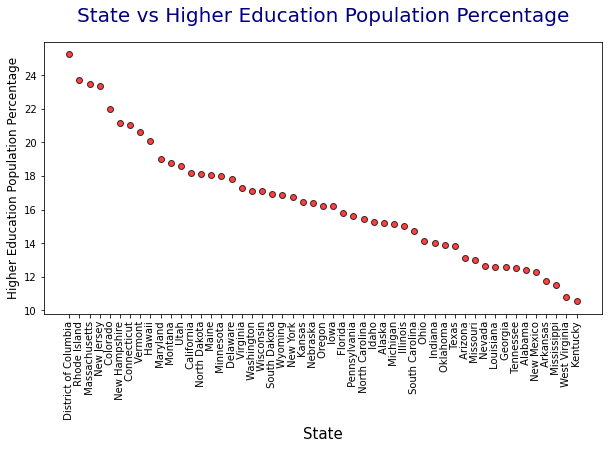

In [7]:
#State vs Percent of Population 25 and greater attaining bachelor's degree
#Scatterplot
x = state_ed["State"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(10,5))
plt.scatter(x, y, marker = 'o', facecolors ='red', edgecolors='black', alpha = 0.75)
x_axis = np.arange(len(x))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, state_ed["State"], rotation="vertical")
plt.xlabel('State', fontsize=15)
plt.ylabel('Higher Education Population Percentage', fontsize=12)
plt.title('State vs Higher Education Population Percentage', fontsize=20,pad=20,color="navy")
plt.show()


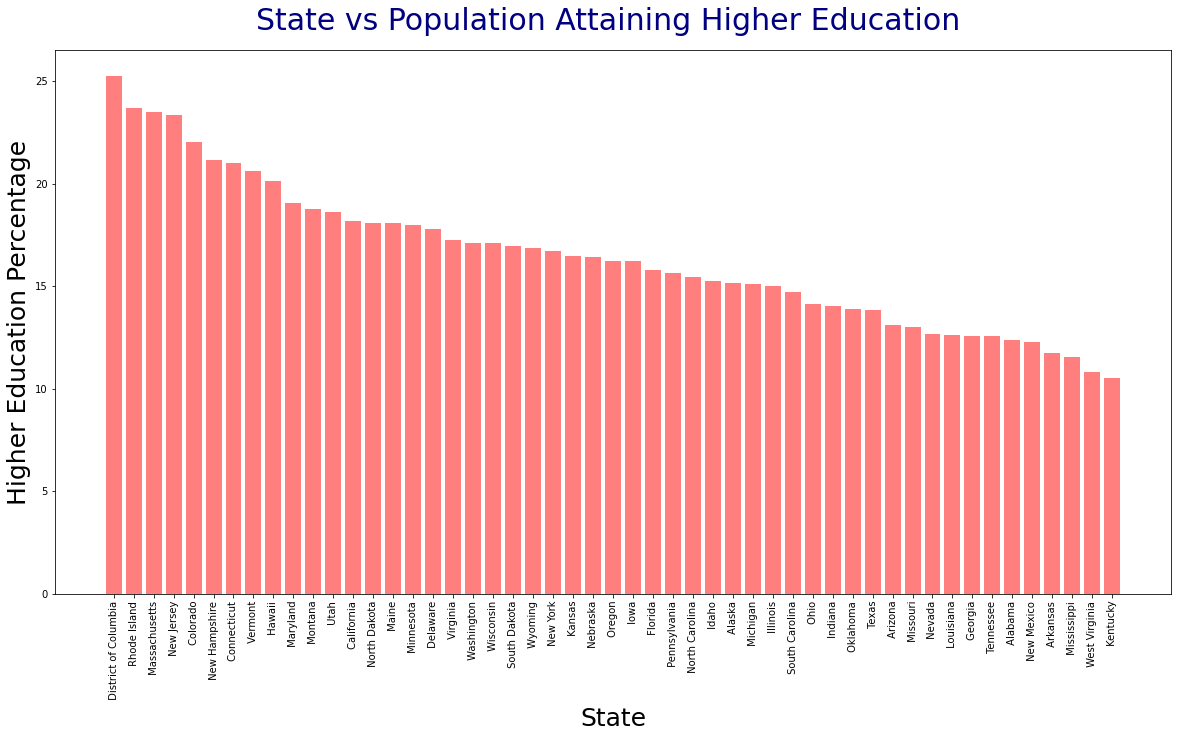

In [8]:
#State vs Percent population 25 and over attaining bachelor's degree
#Bar graph
x = state_ed["State"]
x_axis = np.arange(len(x))
y_axis = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlabel('State', fontsize=25)
plt.ylabel('Higher Education Percentage', fontsize=25)
plt.title('State vs Population Attaining Higher Education ', fontsize=30,pad=20,color="navy")
plt.savefig("Barchart_State_ed")
plt.show()


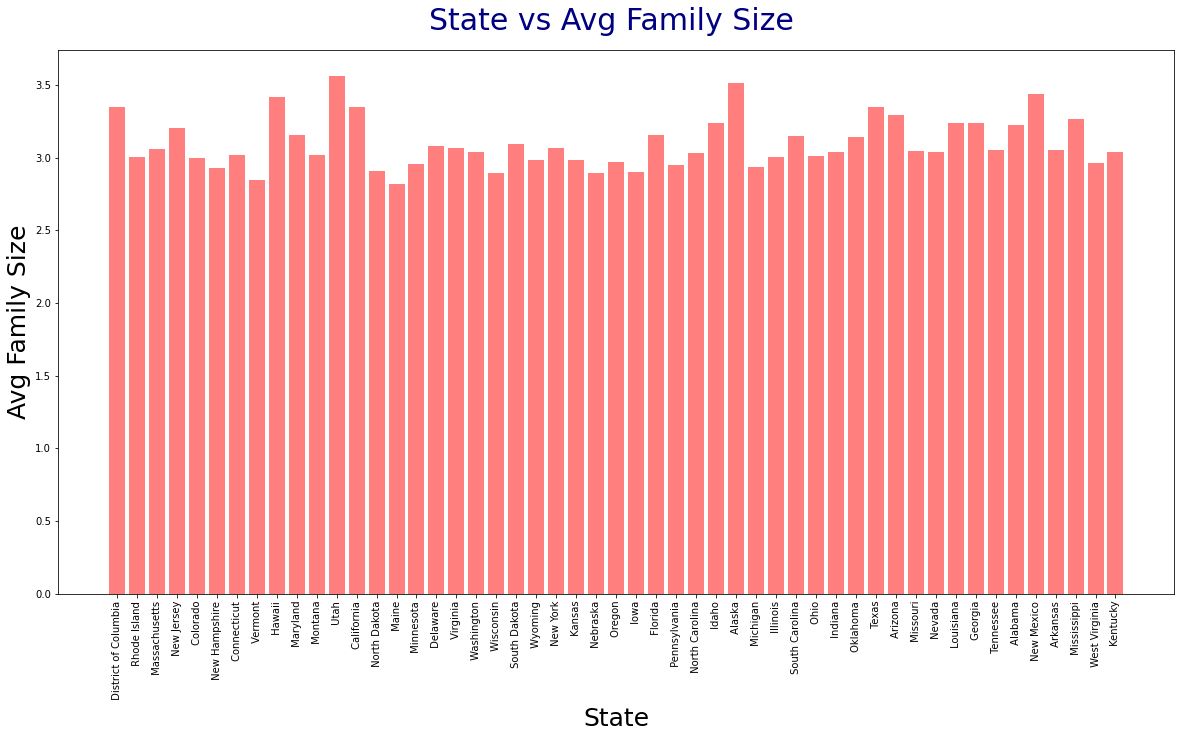

In [9]:
#State vs Avg Family Size
#Bar graph
x = state_ed["State"]
x_axis = np.arange(len(x))
y_axis = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlabel('State', fontsize=25)
plt.ylabel('Avg Family Size', fontsize=25)
plt.title('State vs Avg Family Size ', fontsize=30,pad=20,color="navy")

plt.savefig("Barchart_State_AvgFamilySize")
plt.show()



In [10]:
#calculate Mean/Median
mean = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"].mean()
Med = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"].median()
Std = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"].std()
meanf = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].mean()
Stdf = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].std()
Medf = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].median()
print("Percent educational attainment mean ="+ str(mean))
print("Percent educational attainment median ="+ str(Med))
print("Percent educational attainment standard deviation ="+ str(Std))
print("Avg Family Size Mean ="+ str(meanf))
print("Avg Family Size Median ="+ str(Medf))
print("Avg Family Size standard deviation ="+ str(Stdf))


Percent educational attainment mean =16.439686520228584
Percent educational attainment median =16.243137254901956
Percent educational attainment standard deviation =3.546377864546357
Avg Family Size Mean =3.097651993300869
Avg Family Size Median =3.048257575757576
Avg Family Size standard deviation =0.17238587465693725


In [11]:
#Outliers of Percentage of Education in different States
educationPercentages=state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
educationPercentages

quartiles = educationPercentages.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Percentage of Education is: {lowerq}")
print(f"The upper quartile of Percentage of Education is: {upperq}")
print(f"The interquartile range of Percentage of Education is: {iqr}")
print(f"The the median of Percentage of Education is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Percentage of Education is: 13.869074675324672
The upper quartile of Percentage of Education is: 18.140404040404036
The interquartile range of Percentage of Education is: 4.271329365079364
The the median of Percentage of Education is: 16.243137254901956 
Values below 7.462080627705626 could be outliers.
Values above 24.54739808802308 could be outliers.


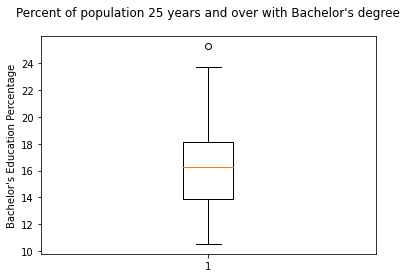

In [12]:
# Box Plot of Percentage of Education in different States
education =state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
fig1, ax1 = plt.subplots()
ax1.set_title( "Percent of population 25 years and over with Bachelor's degree", pad = 20)
ax1.set_ylabel("Bachelor's Education Percentage")
ax1.boxplot(education)
plt.savefig("Boxplot_Education")
plt.show()

In [13]:
#Outliers of Avg Family Size in different States

educationPercentages=state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
educationPercentages
quartiles = educationPercentages.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Avg Family size is: {lowerq}")
print(f"The upper quartile of  Avg Family size is: {upperq}")
print(f"The interquartile range of  Avg Family size is: {iqr}")
print(f"The the median of Avg Family size: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Avg Family size is: 2.985346902654867
The upper quartile of  Avg Family size is: 3.215403138528138
The interquartile range of  Avg Family size is: 0.23005623587327095
The the median of Avg Family size: 3.048257575757576 
Values below 2.6402625488449605 could be outliers.
Values above 3.5604874923380443 could be outliers.


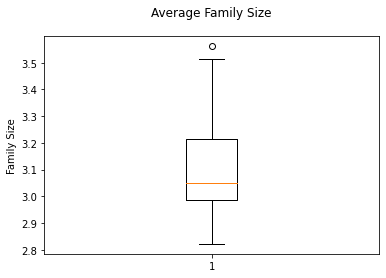

In [14]:
# Box Plot of Avg Family Size in different States
family_size =state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
fig1, ax1 = plt.subplots()
ax1.set_title( 'Average Family Size',pad = 20)
ax1.set_ylabel('Family Size')
ax1.boxplot(family_size)
plt.savefig("Boxplot_AvgFamilySize")
plt.show()

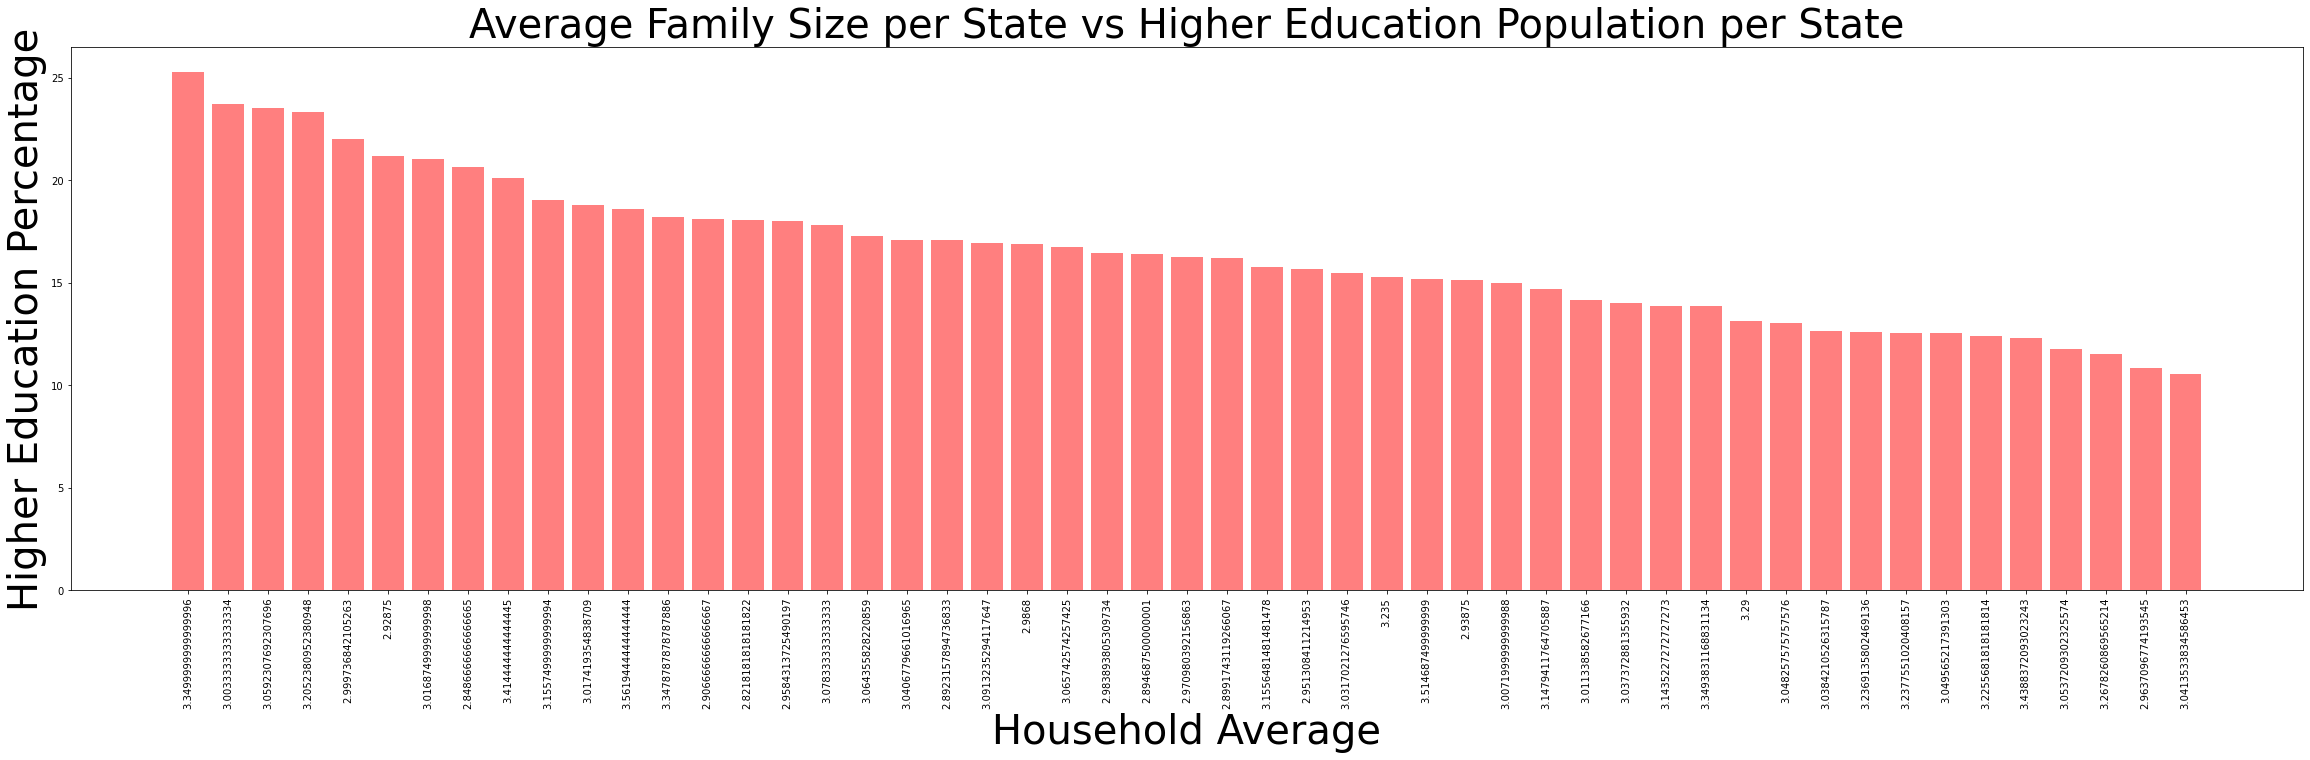

In [15]:
#Household avg family size vs Percent Population attaining higher education by state
#Bar graph
x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
x_axis = np.arange(len(x))
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(40,10))
plt.bar(x_axis, y, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlabel('Household Average', fontsize=40)
plt.ylabel('Higher Education Percentage', fontsize=40)
plt.title('Average Family Size per State vs Higher Education Population per State', fontsize=40)
plt.show()

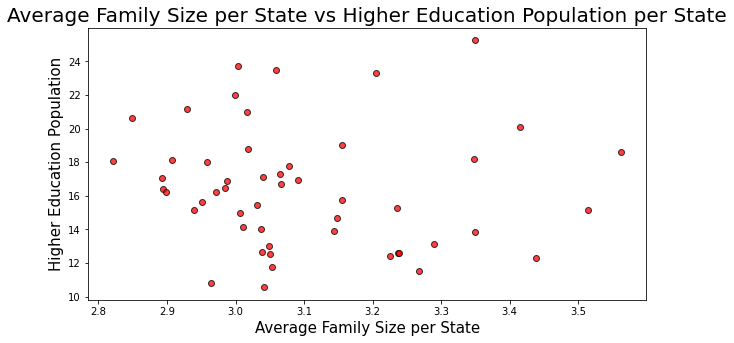

The correlation coefficient between Average Family Size and Higher Education Population per State is -0.09


In [16]:
#Household avg family size vs Percent Population attaining higher education by state
#Scatterplot
x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(10,5))
plt.scatter(x, y, marker = 'o', facecolors ='red', edgecolors='black', alpha = 0.75)
x_axis = np.arange(len(x))
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, state_ed["State"], rotation="vertical")
plt.xlabel('Average Family Size per State', fontsize=15)
plt.ylabel('Higher Education Population', fontsize=15)
plt.title('Average Family Size per State vs Higher Education Population per State', fontsize=20)
plt.show()

# Calculate the correlation coefficient between Average Family Size and Higher Education Population per State
print(f"The correlation coefficient between Average Family Size and Higher Education Population per State is {round(st.pearsonr(x,y)[0],2)}")

The r-squared is: 0.007838425943473596


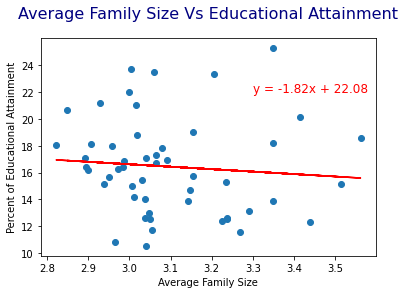

In [17]:
#Household avg. vs Percent Population attaining higher education by state
#Scatterplot with regression formula

x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(3.3,22),fontsize=12,color="red")

plt.xlabel("Average Family Size")
plt.ylabel("Percent of Educational Attainment")
print(f"The r-squared is: {rvalue**2}")
plt.title("Average Family Size Vs Educational Attainment",fontsize=16,color="navy",pad=20)
plt.savefig("Scatter_Family_ed")
plt.show()